In [1]:
# https://github.com/danielwilczak101/EasyGA
!pip install EasyGA

In [2]:
import EasyGA
import random

In [3]:
# Função objetivo: número de pares de rainhas não-atacadas
# nQueens: Numero de rainhas
# Solução ótima: (nQueens x nQueens-1)/2
def fitnessFunction(solucao):
        solucao_list = solucao.gene_value_list
        melhorFitness = (len(solucao_list) * (len(solucao_list) - 1) // 2)
        #Número de ataques
        h = 0
        #Contagem de ataques na diagonal e vertical
        for i in range(0, len(solucao_list)):
            for j in range(i+1, len(solucao_list)):
                if abs(i - j) == abs(solucao_list[i] - solucao_list[j]):
                   h += 1
                # Ataques por linha (horizontal)
                if abs(solucao_list[i] - solucao_list[j]) == 0:
                   h += 1
        return melhorFitness - h

In [40]:
# Create the Genetic algorithm
ga = EasyGA.GA()

# Problem size and optimal solution
sizeQueen = 8
optimalSolution = (sizeQueen* (sizeQueen-1))//2

# Chromosome params
ga.population_size = 50
ga.chromosome_length = sizeQueen
ga.generation_goal = 500

# Create random genes from 1 to 10
ga.gene_impl = lambda: random.randint(1, sizeQueen)

# Maximization of no attacks
ga.target_fitness = 'max'

# Set the fitness goal
ga.fitness_goal = optimalSolution

In [41]:
# Cadastra a função fitness
ga.fitness_function_impl = fitnessFunction

In [42]:
from EasyGA import mutation, crossover, parent

In [43]:
# Change selection, crossover and mutation
ga.crossover_individual_impl = crossover.Crossover.Individual.multi_point
ga.mutation_individual_impl = mutation.Mutation.Individual.Permutation.swap_genes
ga.parent_selection_impl = parent.Parent.Fitness.roulette

In [44]:
print(f'Optimal Solution: {optimalSolution}')
ga.evolve()
ga.print_generation()
ga.print_best_chromosome()

Optimal Solution: 28
Current Generation 	: 500
Best Chromosome 	: [6][3][7][8][1][5][2][8]
Best Fitness    	: 26


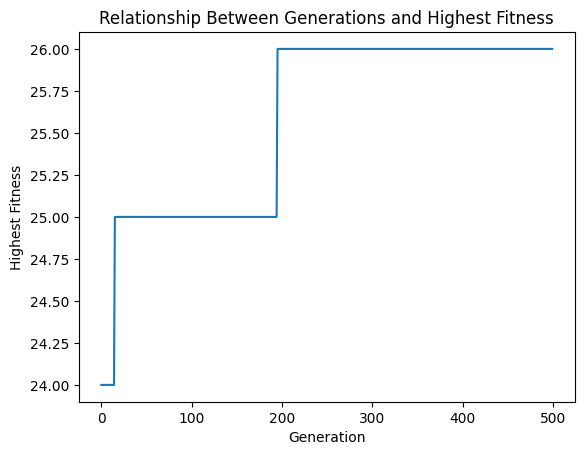

In [45]:
# Mostra a curva de convergência
ga.graph.highest_value_chromosome()
ga.graph.show()